In [1]:
#Ignore these 2 lines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%matplotlib inline 
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import time 
from sklearn.model_selection import train_test_split

In [2]:
##Import libraries for neural network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### Importing data and Changing it into MNIST data format of pytorch

In [3]:
df = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.iloc[:, 1:].values
y = df["label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y)

In [6]:
X_train = torch.Tensor(X_train)
y_train = (torch.Tensor(y_train)).long()
training_set = TensorDataset(X_train, y_train)

X_test = torch.Tensor(X_test)
y_test = (torch.Tensor(y_test)).long()
testing_set = TensorDataset(X_test, y_test)

In [7]:
print("{}, {}, {}, {}".format(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype))

torch.float32, torch.float32, torch.int64, torch.int64


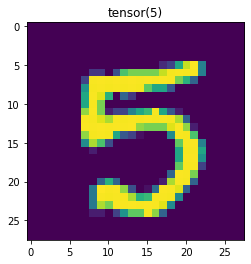

In [8]:
plt.imshow(X_train[6].view(28, 28))
plt.title(y_train[6])
plt.show()

In [9]:
trainset = DataLoader(training_set, batch_size=10, shuffle=True)
testset = DataLoader(testing_set, batch_size=10, shuffle=True)

In [10]:
for data in trainset:
    print(data)
    break

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([3, 5, 8, 4, 2, 8, 2, 7, 3, 5])]


# NeuralNetwork

In [11]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64) # input, output for a layer
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # 10 classes/labels/targets which are there
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 3
start = time.time()
for epoch in range(EPOCHS):
    for data in trainset:
        X,y = data
        net.zero_grad()
        output = net(X.view(-1, 784))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
end = time.time()
print(end - start)

tensor(1.4300, grad_fn=<NllLossBackward>)
tensor(0.0365, grad_fn=<NllLossBackward>)
tensor(0.1887, grad_fn=<NllLossBackward>)
19.02641224861145


In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in testset:
        X,y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(8) tensor(8)
tensor(8) tensor(8)
tensor(9) tensor(9)
tensor(3) tensor(3)
tensor(7) tensor(7)
tensor(1) tensor(1)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(6) tensor(6)
tensor(7) tensor(7)
tensor(7) tensor(7)
tensor(6) tensor(6)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(7) tensor(7)
tensor(7) tensor(7)
tensor(6) tensor(6)
tensor(8) tensor(6)
tensor(2) tensor(2)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(8) tensor(8)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(6) tensor(6)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(3) tensor(3)
tensor(7) tensor(7)
tensor(2) tensor(2)
tensor(6) tensor(6)
tensor(5) tensor(5)


tensor(4) tensor(4)
tensor(5) tensor(5)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(0) tensor(0)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(2) tensor(1)
tensor(5) tensor(5)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(5) tensor(5)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(4) tensor(4)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(7) tensor(7)
tensor(8) tensor(8)
tensor(2) tensor(4)
tensor(5) tensor(5)
tensor(8) tensor(8)
tensor(8) tensor(8)
tensor(1) tensor(1)
tensor(8) tensor(8)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(6) tensor(6)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(0) tensor(0)
tensor(6) tensor(0)
tensor(1) tensor(1)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(6) tensor(6)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(7) tensor(7)
tensor(2) tensor(2)
tensor(2) tensor(2)
tensor(1) tensor(1)
tensor(7) tensor(7)
tensor(1) tensor(1)


tensor(0) tensor(0)
tensor(5) tensor(5)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(2) tensor(2)
tensor(9) tensor(9)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(3) tensor(3)
tensor(7) tensor(9)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(3) tensor(8)
tensor(1) tensor(1)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(4) tensor(4)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(5) tensor(5)
tensor(7) tensor(7)
tensor(8) tensor(8)
tensor(9) tensor(9)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(5) tensor(5)
tensor(6) tensor(6)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(1) tensor(1)
tensor(2) tensor(2)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(2) tensor(2)
tensor(2) tensor(2)
tensor(9) tensor(9)
tensor(5) tensor(5)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(3) tensor(3)
tensor(7) tensor(7)
tensor(7) tensor(7)
tensor(5) tensor(5)


tensor(5) tensor(5)
tensor(2) tensor(2)
tensor(1) tensor(1)
tensor(0) tensor(0)
tensor(6) tensor(6)
tensor(2) tensor(2)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(9) tensor(8)
tensor(4) tensor(4)
tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(8) tensor(8)
tensor(6) tensor(6)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(6) tensor(6)
tensor(5) tensor(5)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(6) tensor(6)
tensor(5) tensor(5)
tensor(8) tensor(8)
tensor(5) tensor(5)
tensor(8) tensor(8)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(8) tensor(8)
tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(0) tensor(0)
tensor(3) tensor(3)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(7) tensor(7)
tensor(6) tensor(6)
tensor(2) tensor(2)
tensor(4) tensor(4)
tensor(3) tensor(3)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(5) tensor(5)
tensor(9) tensor(9)


tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(4) tensor(4)
tensor(4) tensor(4)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(8) tensor(8)
tensor(9) tensor(9)
tensor(3) tensor(3)
tensor(3) tensor(3)
tensor(7) tensor(7)
tensor(4) tensor(4)
tensor(3) tensor(9)
tensor(7) tensor(7)
tensor(4) tensor(4)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(7) tensor(7)
tensor(6) tensor(6)
tensor(0) tensor(0)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(4) tensor(4)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(7) tensor(7)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(7) tensor(7)
tensor(7) tensor(7)
tensor(7) tensor(7)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(0) tensor(0)
tensor(8) tensor(8)
tensor(8) tensor(8)
tensor(5) tensor(5)
tensor(7) tensor(7)
tensor(0) tensor(0)
tensor(3) tensor(3)
tensor(5) tensor(5)


tensor(8) tensor(8)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(6) tensor(5)
tensor(2) tensor(6)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(2) tensor(3)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(5) tensor(5)
tensor(7) tensor(7)
tensor(0) tensor(0)
tensor(4) tensor(4)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(8) tensor(8)
tensor(8) tensor(8)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(3) tensor(3)
tensor(3) tensor(3)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(2) tensor(7)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(0) tensor(0)
tensor(3) tensor(5)
tensor(8) tensor(8)
tensor(8) tensor(8)
tensor(9) tensor(9)
tensor(9) tensor(9)
tensor(6) tensor(6)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(7) tensor(7)
tensor(0) tensor(0)
tensor(0) tensor(0)
tensor(7) tensor(7)
tensor(0) tensor(0)


tensor(1) tensor(1)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(1) tensor(1)
tensor(3) tensor(5)
tensor(4) tensor(7)
tensor(2) tensor(7)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(3) tensor(3)
tensor(8) tensor(5)
tensor(2) tensor(2)
tensor(3) tensor(8)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(5) tensor(5)
tensor(2) tensor(2)
tensor(6) tensor(6)
tensor(9) tensor(9)
tensor(3) tensor(3)
tensor(4) tensor(4)
tensor(5) tensor(5)
tensor(6) tensor(6)
tensor(2) tensor(6)
tensor(3) tensor(9)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(4) tensor(4)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(0) tensor(0)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(7) tensor(7)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(5) tensor(3)
tensor(8) tensor(3)
tensor(1) tensor(1)
tensor(0) tensor(0)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(8) tensor(8)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(2) tensor(2)


tensor(3) tensor(3)
tensor(0) tensor(0)
tensor(8) tensor(8)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(0) tensor(0)
tensor(6) tensor(6)
tensor(8) tensor(9)
tensor(2) tensor(2)
tensor(9) tensor(4)
tensor(6) tensor(6)
tensor(6) tensor(6)
tensor(2) tensor(2)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(1) tensor(1)
tensor(2) tensor(2)
tensor(0) tensor(0)
tensor(7) tensor(7)
tensor(0) tensor(0)
tensor(7) tensor(7)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(7) tensor(7)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(6) tensor(6)
tensor(6) tensor(6)
tensor(9) tensor(9)
tensor(3) tensor(3)
tensor(0) tensor(0)


tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(0) tensor(0)
tensor(2) tensor(2)
tensor(0) tensor(0)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(5) tensor(5)
tensor(4) tensor(4)
tensor(1) tensor(1)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(4) tensor(4)
tensor(4) tensor(4)
tensor(4) tensor(4)
tensor(4) tensor(4)
tensor(3) tensor(3)
tensor(8) tensor(8)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(2) tensor(2)
tensor(0) tensor(0)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(8) tensor(8)
tensor(2) tensor(2)
tensor(0) tensor(0)
tensor(3) tensor(3)
tensor(0) tensor(0)
tensor(7) tensor(7)
tensor(8) tensor(8)
tensor(9) tensor(4)
tensor(6) tensor(6)
tensor(3) tensor(3)
tensor(0) tensor(0)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(0) tensor(0)
tensor(6) tensor(6)
tensor(0) tensor(0)


tensor(6) tensor(6)
tensor(0) tensor(0)
tensor(3) tensor(3)
tensor(6) tensor(6)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(1) tensor(1)
tensor(3) tensor(5)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(4) tensor(4)
tensor(8) tensor(9)
tensor(7) tensor(7)
tensor(4) tensor(4)
tensor(4) tensor(4)
tensor(4) tensor(4)
tensor(8) tensor(8)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(2) tensor(1)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(1) tensor(1)
tensor(6) tensor(6)
tensor(2) tensor(2)
tensor(2) tensor(2)
tensor(4) tensor(4)
tensor(8) tensor(8)
tensor(1) tensor(1)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(8) tensor(8)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(8) tensor(8)
tensor(2) tensor(2)
tensor(9) tensor(9)


tensor(2) tensor(2)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(6) tensor(6)
tensor(6) tensor(6)
tensor(6) tensor(6)
tensor(8) tensor(0)
tensor(0) tensor(0)
tensor(4) tensor(4)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(5) tensor(5)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(0) tensor(0)
tensor(6) tensor(6)
tensor(4) tensor(4)
tensor(4) tensor(4)
tensor(8) tensor(8)
tensor(8) tensor(8)
tensor(7) tensor(7)
tensor(0) tensor(0)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(2) tensor(2)
tensor(2) tensor(2)
tensor(6) tensor(6)
tensor(4) tensor(4)
tensor(0) tensor(0)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(2) tensor(2)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(7) tensor(7)
tensor(0) tensor(0)
tensor(6) tensor(6)
tensor(6) tensor(6)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(9) tensor(5)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(3) tensor(3)


tensor(8) tensor(8)
tensor(8) tensor(8)
tensor(5) tensor(3)
tensor(2) tensor(2)
tensor(2) tensor(2)
tensor(8) tensor(8)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(5) tensor(5)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(8) tensor(8)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(1) tensor(1)
tensor(0) tensor(0)
tensor(2) tensor(2)
tensor(8) tensor(8)
tensor(2) tensor(2)
tensor(5) tensor(5)
tensor(5) tensor(3)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(3) tensor(1)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(0) tensor(0)
tensor(5) tensor(5)
tensor(4) tensor(7)
tensor(0) tensor(0)
tensor(4) tensor(4)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(7) tensor(7)
tensor(0) tensor(0)
tensor(7) tensor(7)
tensor(4) tensor(9)
tensor(2) tensor(2)
tensor(6) tensor(6)
tensor(5) tensor(5)
tensor(5) tensor(5)
tensor(2) tensor(2)
tensor(7) tensor(7)


tensor(2) tensor(2)
tensor(4) tensor(4)
tensor(0) tensor(0)
tensor(3) tensor(3)
tensor(4) tensor(4)
tensor(0) tensor(0)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(5) tensor(5)
tensor(4) tensor(4)
tensor(8) tensor(8)
tensor(9) tensor(9)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(1) tensor(1)
tensor(2) tensor(2)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(8) tensor(8)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(7) tensor(7)
tensor(7) tensor(3)
tensor(2) tensor(2)
tensor(7) tensor(7)
tensor(2) tensor(2)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(0) tensor(0)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(6) tensor(6)
tensor(5) tensor(5)
tensor(5) tensor(5)
tensor(2) tensor(2)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(0) tensor(0)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(8) tensor(8)
tensor(9) tensor(9)


tensor(6) tensor(6)
tensor(3) tensor(3)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(0) tensor(0)
tensor(7) tensor(7)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(6) tensor(6)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(8) tensor(8)
tensor(7) tensor(7)
tensor(4) tensor(4)
tensor(0) tensor(0)
tensor(8) tensor(8)
tensor(4) tensor(4)
tensor(8) tensor(5)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(6) tensor(6)
tensor(5) tensor(5)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(3) tensor(3)
tensor(7) tensor(7)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(6) tensor(6)


tensor(5) tensor(5)
tensor(0) tensor(0)
tensor(3) tensor(3)
tensor(6) tensor(6)
tensor(5) tensor(5)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(1) tensor(1)
tensor(7) tensor(7)
tensor(5) tensor(5)
tensor(0) tensor(0)
tensor(7) tensor(2)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(1) tensor(4)
tensor(8) tensor(8)
tensor(7) tensor(7)
tensor(0) tensor(0)
tensor(5) tensor(5)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(3) tensor(3)
tensor(2) tensor(2)
tensor(9) tensor(9)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(4) tensor(4)
tensor(3) tensor(8)
tensor(2) tensor(2)
tensor(7) tensor(7)
tensor(6) tensor(6)
tensor(6) tensor(6)
tensor(2) tensor(2)
tensor(4) tensor(4)
tensor(1) tensor(1)
tensor(7) tensor(7)
tensor(5) tensor(5)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(4) tensor(9)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(0) tensor(0)
tensor(2) tensor(2)
tensor(9) tensor(4)
tensor(9) tensor(9)


tensor(0) tensor(0)
tensor(2) tensor(2)
tensor(5) tensor(5)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(6) tensor(6)
tensor(4) tensor(4)
tensor(8) tensor(8)
tensor(2) tensor(2)
tensor(5) tensor(5)
tensor(0) tensor(0)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(0) tensor(0)
tensor(4) tensor(4)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(5) tensor(5)
tensor(6) tensor(6)
tensor(0) tensor(0)
tensor(0) tensor(0)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(6) tensor(6)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(5) tensor(5)
tensor(8) tensor(8)
tensor(8) tensor(8)
tensor(4) tensor(4)
tensor(9) tensor(9)
tensor(5) tensor(5)
tensor(9) tensor(9)
tensor(5) tensor(5)
tensor(1) tensor(5)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(9) tensor(3)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(5) tensor(5)


tensor(2) tensor(2)
tensor(4) tensor(4)
tensor(6) tensor(6)
tensor(2) tensor(2)
tensor(6) tensor(6)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(9) tensor(9)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(7) tensor(7)
tensor(8) tensor(8)
tensor(3) tensor(3)
tensor(8) tensor(8)
tensor(2) tensor(2)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(4) tensor(4)
tensor(5) tensor(5)
tensor(2) tensor(2)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(5) tensor(5)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(4) tensor(4)
tensor(0) tensor(0)
tensor(0) tensor(0)
tensor(2) tensor(2)
tensor(3) tensor(8)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(9) tensor(8)
tensor(6) tensor(6)
tensor(3) tensor(3)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(6) tensor(6)
tensor(2) tensor(2)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(7) tensor(7)


tensor(4) tensor(4)
tensor(8) tensor(8)
tensor(8) tensor(8)
tensor(7) tensor(7)
tensor(4) tensor(4)
tensor(4) tensor(4)
tensor(8) tensor(8)
tensor(3) tensor(3)
tensor(7) tensor(7)
tensor(7) tensor(7)
tensor(7) tensor(7)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(8) tensor(8)
tensor(1) tensor(1)
tensor(8) tensor(8)
tensor(5) tensor(5)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(3) tensor(3)
tensor(4) tensor(4)
tensor(5) tensor(5)
tensor(4) tensor(4)
tensor(6) tensor(6)
tensor(8) tensor(8)
tensor(0) tensor(0)
tensor(8) tensor(8)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(2) tensor(2)
tensor(5) tensor(5)
tensor(6) tensor(6)
tensor(6) tensor(6)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(2) tensor(2)
tensor(6) tensor(6)
tensor(9) tensor(9)
tensor(5) tensor(5)
tensor(8) tensor(8)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(8) tensor(8)
tensor(5) tensor(5)
tensor(8) tensor(8)
tensor(2) tensor(7)
tensor(1) tensor(1)
tensor(0) tensor(0)
tensor(7) tensor(7)


tensor(0) tensor(0)
tensor(8) tensor(8)
tensor(8) tensor(8)
tensor(9) tensor(9)
tensor(5) tensor(3)
tensor(1) tensor(1)
tensor(0) tensor(0)
tensor(6) tensor(6)
tensor(7) tensor(7)
tensor(8) tensor(8)
tensor(5) tensor(5)
tensor(2) tensor(2)
tensor(6) tensor(6)
tensor(0) tensor(0)
tensor(3) tensor(3)
tensor(0) tensor(0)
tensor(6) tensor(4)
tensor(2) tensor(2)
tensor(5) tensor(5)
tensor(0) tensor(0)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(6) tensor(6)
tensor(7) tensor(2)
tensor(8) tensor(8)
tensor(7) tensor(7)
tensor(0) tensor(0)
tensor(8) tensor(8)
tensor(4) tensor(4)
tensor(5) tensor(5)
tensor(2) tensor(2)
tensor(6) tensor(6)
tensor(7) tensor(7)
tensor(5) tensor(5)
tensor(8) tensor(8)
tensor(1) tensor(1)
tensor(8) tensor(8)
tensor(4) tensor(4)
tensor(4) tensor(4)
tensor(8) tensor(8)
tensor(2) tensor(2)
tensor(3) tensor(5)
tensor(5) tensor(5)
tensor(6) tensor(6)
tensor(2) tensor(2)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(8) tensor(8)


tensor(0) tensor(0)
tensor(1) tensor(1)
tensor(2) tensor(2)
tensor(0) tensor(0)
tensor(2) tensor(2)
tensor(7) tensor(7)
tensor(0) tensor(0)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(6) tensor(6)
tensor(5) tensor(5)
tensor(8) tensor(8)
tensor(5) tensor(5)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(2) tensor(2)
tensor(2) tensor(2)
tensor(0) tensor(0)
tensor(0) tensor(0)
tensor(4) tensor(4)
tensor(5) tensor(5)
tensor(8) tensor(8)
tensor(2) tensor(2)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(8) tensor(8)
tensor(3) tensor(3)
tensor(4) tensor(4)
tensor(6) tensor(6)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(6) tensor(6)
tensor(0) tensor(0)
tensor(7) tensor(7)
tensor(8) tensor(8)
tensor(5) tensor(5)
tensor(8) tensor(8)
tensor(6) tensor(6)
tensor(2) tensor(2)
tensor(4) tensor(4)
tensor(8) tensor(8)
tensor(4) tensor(4)
tensor(6) tensor(6)
tensor(0) tensor(0)
tensor(6) tensor(6)
tensor(4) tensor(4)
tensor(7) tensor(7)


tensor(6) tensor(6)
tensor(2) tensor(2)
tensor(1) tensor(1)
tensor(8) tensor(8)
tensor(5) tensor(5)
tensor(5) tensor(5)
tensor(9) tensor(9)
tensor(3) tensor(9)
tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(0) tensor(0)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(7) tensor(7)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(0) tensor(0)
tensor(7) tensor(7)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(6) tensor(6)
tensor(0) tensor(0)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(1) tensor(1)
tensor(6) tensor(6)
tensor(4) tensor(4)
tensor(3) tensor(3)
tensor(4) tensor(4)
tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(8) tensor(8)
tensor(9) tensor(9)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(2) tensor(2)
tensor(1) tensor(1)
tensor(9) tensor(9)
tensor(3) tensor(3)
tensor(3) tensor(3)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(2) tensor(2)
tensor(2) tensor(2)
tensor(8) tensor(8)
tensor(1) tensor(1)


In [21]:
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.947
